In this notebook, we are using the historical price data with trends table and the tweet sentiments table to aggregate a total sentiment score for the given stock for each working day.
Sentiment scores are aggregated via simple mean, and sentiment scores for days when the stock market is closed are transfered to the first working day after that.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date

In [2]:
#read the data
sent = pd.read_csv('data/tweets_separated/ntdoy.csv')
price = pd.read_csv('data/prices_trends/ntdoytrendsandprices.csv')

In [4]:
#price data table we used does not include the year 2023, so the tweets from 2023 are not used
sent = sent.loc[sent.Date < '2023-01-01']

In [5]:
#sorting the tweets by date
sent.sort_values(by=["Date"],inplace=True)

In [6]:
sent.reset_index(inplace=True, drop=True)

In [8]:
#aggregating previous flair sentiment scores into a simpler form
sent["flair comp"] = None
for i in sent.index:
    sent.loc[i,"flair comp"] = sent.loc[i,"flair probability"] if sent.loc[i,"flair sentiment"] == "POSITIVE" else -sent.loc[i,"flair probability"]

In [9]:
#picking the needed columns
sent = sent.loc[:,["Date","compound","pos","neg","neu","fb pos","fb neg","fb neu","flair comp"]]

In [10]:
sent.head()

,Date,compound,pos,neg,neu,fb pos,fb neg,fb neu,flair comp
0,2019-01-11 16:16:04+00:00,-0.3612,0.000,0.143,0.857,0.120113,0.012852,0.867035,-0.828297
1,2019-01-11 21:54:59+00:00,0.2023,0.153,0.000,0.847,0.442384,0.025262,0.532354,0.749075
2,2019-01-16 14:16:05+00:00,0.0000,0.000,0.000,1.000,0.070728,0.013505,0.915767,0.718112
3,2019-01-22 20:16:11+00:00,0.0000,0.000,0.000,1.000,0.069613,0.014579,0.915809,-0.807246
4,2019-01-25 14:16:16+00:00,0.7003,0.149,0.000,0.851,0.404953,0.020276,0.574771,-0.925878


In [57]:
price.head()

,Date (GMT),Open,Last,emaTrend,trendBrDana,FutureReturn,FutureEmaTrend,FutureTrendBrDana
0,2019-01-02,100.24,104.01,0,0,1.92,-1.0,0.0
1,2019-01-03,102.40,99.15,-1,0,6.22,-1.0,0.0
2,2019-01-04,101.13,101.70,-1,0,6.56,1.0,0.0
3,2019-01-07,101.50,104.41,1,0,2.92,1.0,0.0
4,2019-01-08,106.21,107.92,1,0,-8.11,-1.0,0.0


In [58]:
#defining the aggregation function
def spajanje(price, sent):
    price['vaderComp']=0
    price['vaderPos']=0
    price['vaderNeg']=0
    price['vaderNeu']=0
    price['fbPos']=0
    price['fbNeg']=0
    price['fbNeu']=0
    price['flair']=0
    j = 0
    for i in price.index:
        row = pd.DataFrame(columns=price.columns[8:16])
        while j < sent.index.stop and date.fromisoformat(str(sent.Date[j])[:10]) <= date.fromisoformat(price['Date (GMT)'][i]):
            row.loc[len(row)] = dict(zip(price.columns[8:16], sent.iloc[j,1:9]))
            j+=1
        price.loc[i,'vaderComp':'flair'] += row.mean()




In [59]:
spajanje(price,sent)

In [60]:
price

,Date (GMT),Open,Last,emaTrend,trendBrDana,FutureReturn,FutureEmaTrend,FutureTrendBrDana,vaderComp,vaderPos,vaderNeg,vaderNeu,fbPos,fbNeg,fbNeu,flair
0,2019-01-02,100.24,104.01,0,0,1.92,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,102.40,99.15,-1,0,6.22,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,101.13,101.70,-1,0,6.56,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,101.50,104.41,1,0,2.92,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,106.21,107.92,1,0,-8.11,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2022-12-23,98.98,99.83,-1,0,NaN,NaN,NaN,0.3612,0.238,0.0,0.762,0.171889,0.018337,0.809774,0.956937
1004,2022-12-27,99.34,99.38,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,2022-12-28,99.42,99.69,-1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,2022-12-29,100.19,101.34,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The correlation matrix was used for consulting with my mentor to pick which columns will be used after this point

In [61]:
price.corr()

,Open,Last,emaTrend,trendBrDana,FutureReturn,FutureEmaTrend,FutureTrendBrDana,vaderComp,vaderPos,vaderNeg,vaderNeu,fbPos,fbNeg,fbNeu,flair
Open,1.000000,0.996117,0.041561,0.052076,-0.144386,-0.137362,-0.082281,0.005373,-0.052333,-0.012707,0.053857,-0.040012,-0.007710,0.036529,0.125912
Last,0.996117,1.000000,0.075110,0.053212,-0.147164,-0.131626,-0.084685,0.012610,-0.044308,-0.017069,0.048741,-0.036501,-0.008040,0.034026,0.134496
emaTrend,0.041561,0.075110,1.000000,0.306384,-0.048724,0.109349,-0.050565,-0.035594,-0.040258,0.003181,0.035068,0.065069,0.041845,-0.079836,-0.022661
trendBrDana,0.052076,0.053212,0.306384,1.000000,-0.073727,0.030904,-0.061567,-0.053166,-0.062585,0.078546,0.017705,0.085065,0.069635,-0.114779,-0.066182
FutureReturn,-0.144386,-0.147164,-0.048724,-0.073727,1.000000,0.678914,0.444331,-0.021065,-0.054542,-0.048662,0.073566,-0.030357,-0.103080,0.095470,0.090069
FutureEmaTrend,-0.137362,-0.131626,0.109349,0.030904,0.678914,1.000000,0.307942,-0.072588,-0.076743,0.015306,0.061626,0.057562,-0.057494,-0.004757,0.083598
FutureTrendBrDana,-0.082281,-0.084685,-0.050565,-0.061567,0.444331,0.307942,1.000000,-0.043469,-0.072841,-0.091053,0.111417,-0.049024,-0.057394,0.078169,0.077513
vaderComp,0.005373,0.012610,-0.035594,-0.053166,-0.021065,-0.072588,-0.043469,1.000000,0.789756,-0.508917,-0.463605,0.194090,-0.114712,-0.071149,0.178375
vaderPos,-0.052333,-0.044308,-0.040258,-0.062585,-0.054542,-0.076743,-0.072841,0.789756,1.000000,-0.080023,-0.868089,0.226740,-0.042233,-0.147099,0.105031
vaderNeg,-0.012707,-0.017069,0.003181,0.078546,-0.048662,0.015306,-0.091053,-0.508917,-0.080023,1.000000,-0.425349,0.006318,0.266062,-0.190405,-0.196199


<AxesSubplot:>

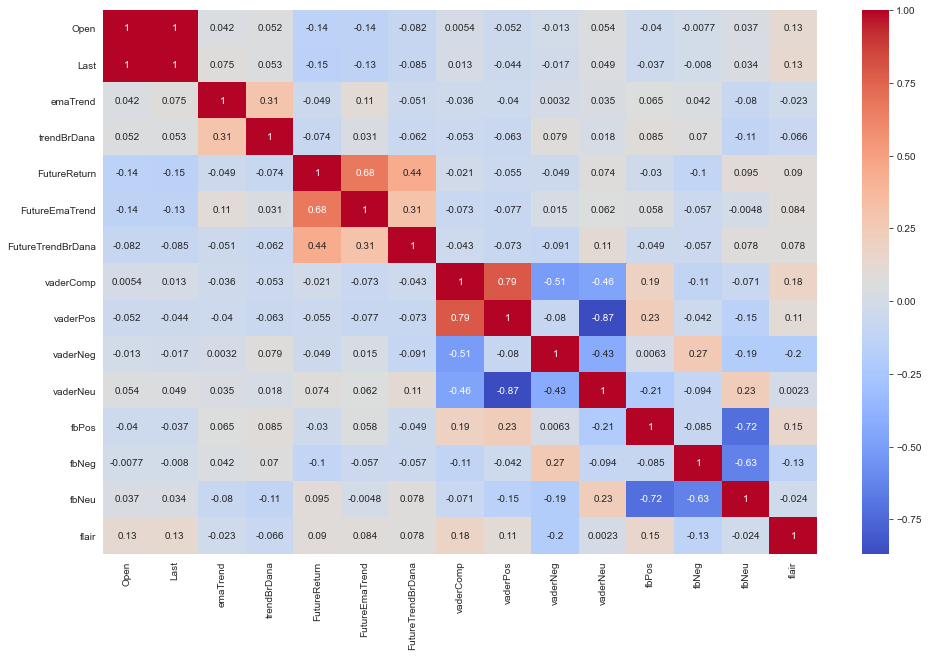

In [62]:
plt.figure(figsize=(16,10))
sns.heatmap(price.corr(), annot=True, cmap='coolwarm')

In [63]:
price.head()


,Date (GMT),Open,Last,emaTrend,trendBrDana,FutureReturn,FutureEmaTrend,FutureTrendBrDana,vaderComp,vaderPos,vaderNeg,vaderNeu,fbPos,fbNeg,fbNeu,flair
0,2019-01-02,100.24,104.01,0,0,1.92,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,102.40,99.15,-1,0,6.22,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,101.13,101.70,-1,0,6.56,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,101.50,104.41,1,0,2.92,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,106.21,107.92,1,0,-8.11,-1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
final = price[["Date (GMT)","Last","emaTrend","trendBrDana","fbPos", "fbNeg", "fbNeu", "FutureEmaTrend"]]

In [65]:
final.head(20)

,Date (GMT),Last,emaTrend,trendBrDana,fbPos,fbNeg,fbNeu,FutureEmaTrend
0,2019-01-02,104.01,0,0,NaN,NaN,NaN,-1.0
1,2019-01-03,99.15,-1,0,NaN,NaN,NaN,-1.0
2,2019-01-04,101.70,-1,0,NaN,NaN,NaN,1.0
3,2019-01-07,104.41,1,0,NaN,NaN,NaN,1.0
4,2019-01-08,107.92,1,0,NaN,NaN,NaN,-1.0
5,2019-01-09,107.46,1,0,NaN,NaN,NaN,-1.0
6,2019-01-10,110.00,1,0,NaN,NaN,NaN,-1.0
7,2019-01-11,109.03,1,0,0.281248,0.019057,0.699695,-1.0
8,2019-01-14,104.98,-1,0,NaN,NaN,NaN,-1.0
9,2019-01-15,106.49,1,0,NaN,NaN,NaN,-1.0


In [66]:
#saving the final dataframe
final.to_csv('data/final/ttwo.csv', sep=',', index=False)